In [998]:
import pandas as pd
import numpy as np
from scipy.io import arff
import matplotlib.pyplot as plt
from sklearn import decomposition
import scanpy as sc


# Data importing using Pandas

Data: gene expression cancer RNA-Seq Dataset 

Taken from: https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq

Source: Samuele Fiorini, samuele.fiorini '@' dibris.unige.it, University of Genoa, redistributed under Creative Commons license (http://creativecommons.org/licenses/by/3.0/legalcode) from https://www.synapse.org/#!Synapse:syn4301332.

In [1082]:
data = pd.read_csv('data.csv', index_col = 0)
labels = pd.read_csv('labels.csv', index_col = 0)


The dataset is composed of 801 instances and 20531 attributes. Additionally there is a data file for cancer type for each sample

In [1083]:
data.head(10)

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.000000,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.000000,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.000000,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.000000,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.000000,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0
sample_5,0.0,3.467853,3.581918,6.620243,9.706829,0.0,7.758510,0.000000,0.0,0.000000,...,5.726657,8.602588,9.928339,6.096154,9.816001,11.556995,9.244150,9.836473,5.355133,0.0
sample_6,0.0,1.224966,1.691177,6.572007,9.640511,0.0,6.754888,0.531868,0.0,0.000000,...,5.105904,7.927968,9.673966,1.877744,9.802692,13.256060,9.664486,9.244219,8.330912,0.0
sample_7,0.0,2.854853,1.750478,7.226720,9.758691,0.0,5.952103,0.000000,0.0,0.000000,...,5.297833,8.277092,9.599230,5.244290,9.994339,12.670377,9.987733,9.216872,6.551490,0.0
sample_8,0.0,3.992125,2.772730,6.546692,10.488252,0.0,7.690222,0.352307,0.0,4.067604,...,6.721974,9.597533,9.763753,7.933278,10.952880,12.498919,10.389954,10.390255,7.828321,0.0
sample_9,0.0,3.642494,4.423558,6.849511,9.464466,0.0,7.947216,0.724214,0.0,0.000000,...,6.020051,8.712809,10.259096,6.131583,9.923582,11.144295,9.244851,9.484299,4.759151,0.0


There were two files: one with data and one with labels for cancer types for each sample. Let's add the Class labels to the dataset

In [1084]:
data_num = data.copy()

In [1085]:
data['Cancer Type'] = labels

In [638]:
data.head(10)

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Cancer Type
sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.000000,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.000000,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.000000,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.000000,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.000000,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA
sample_5,0.0,3.467853,3.581918,6.620243,9.706829,0.0,7.758510,0.000000,0.0,0.000000,...,8.602588,9.928339,6.096154,9.816001,11.556995,9.244150,9.836473,5.355133,0.0,PRAD
sample_6,0.0,1.224966,1.691177,6.572007,9.640511,0.0,6.754888,0.531868,0.0,0.000000,...,7.927968,9.673966,1.877744,9.802692,13.256060,9.664486,9.244219,8.330912,0.0,KIRC
sample_7,0.0,2.854853,1.750478,7.226720,9.758691,0.0,5.952103,0.000000,0.0,0.000000,...,8.277092,9.599230,5.244290,9.994339,12.670377,9.987733,9.216872,6.551490,0.0,PRAD
sample_8,0.0,3.992125,2.772730,6.546692,10.488252,0.0,7.690222,0.352307,0.0,4.067604,...,9.597533,9.763753,7.933278,10.952880,12.498919,10.389954,10.390255,7.828321,0.0,BRCA
sample_9,0.0,3.642494,4.423558,6.849511,9.464466,0.0,7.947216,0.724214,0.0,0.000000,...,8.712809,10.259096,6.131583,9.923582,11.144295,9.244851,9.484299,4.759151,0.0,PRAD


Let's investigate the count coverage for each sample by plotting the sum count number for each sample

Standard deviantion is 3183.4379502621327
Mean  is 132287.8491241417


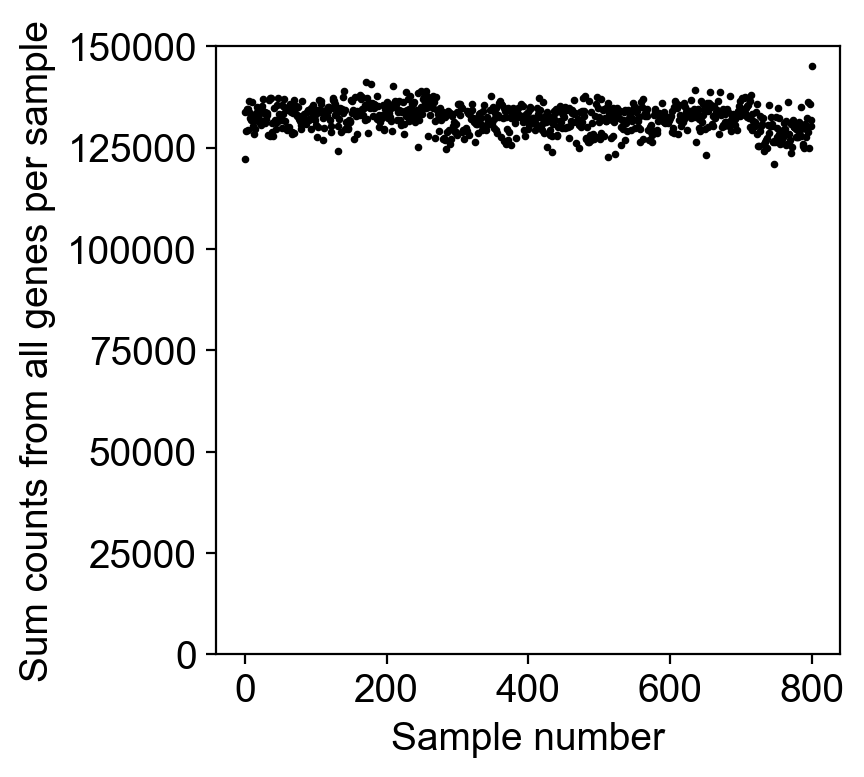

In [639]:
fig, ax = plt.subplots(1, 1)
ax.scatter(range(0, 801), adata.X.T.sum(0).tolist(), c='black', alpha = 1, s = 3)
ax.grid(False)
ax.set_ylim(0, 150000)
ax.set_xlabel('Sample number')
ax.set_ylabel('Sum counts from all genes per sample')
print('Standard deviantion is', np.std(adata.X.T.sum(0).tolist()))
print('Mean  is', np.mean(adata.X.T.sum(0).tolist()))

The count number for each sample is similar: 132287.85 +- 3183.43 and the data counts are already normalized

Let's plot the of gene expression dispersion against it's mean expression

Text(0, 0.5, 'log10(1+fano_f of gene)')

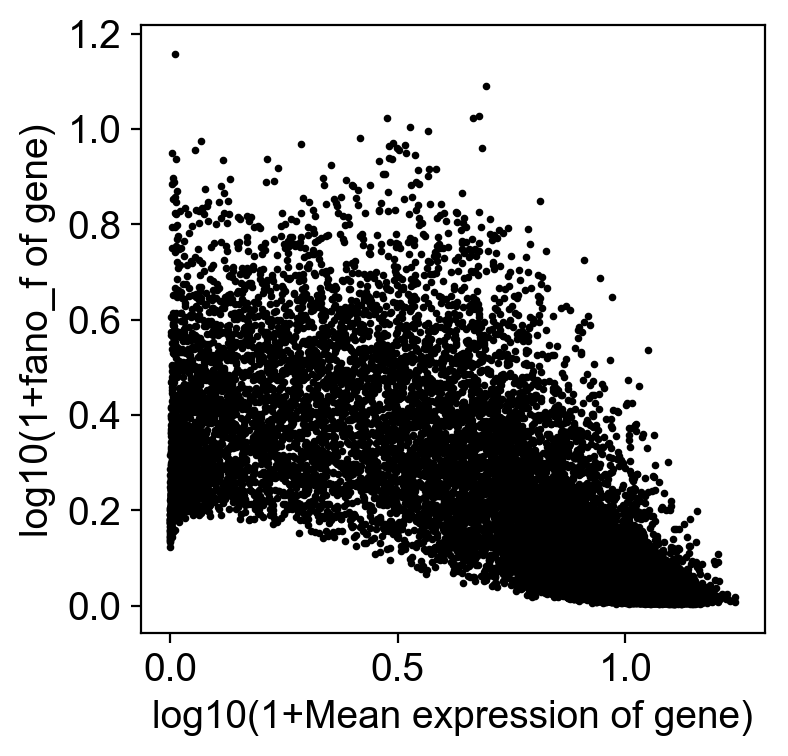

In [640]:
fig, ax = plt.subplots(1, 1)
fano_f = np.var(data_num)/np.mean(data_num)
ax.scatter(np.log10(1+np.mean(data_num)), np.log10(1+ fano_f), c='black', alpha = 1, s = 3)
ax.grid(False)
ax.set_xlabel('log10(1+Mean expression of gene)')
ax.set_ylabel('log10(1+fano_f of gene)')

More expressed genes have a lower variance. Highest variance is seen for 0.5 log10(1+mean expression)

In [642]:
desc_data = data.describe()

In [643]:
# too many variables
desc_data.head(10)

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,0.013428,...,5.896573,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411
std,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,0.204722,...,0.746399,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529
min,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,0.000000,...,2.853517,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000
25%,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,0.000000,...,5.454926,8.383834,9.826027,3.130750,9.400747,11.315857,9.836525,9.244219,4.092385,0.000000
50%,0.000000,3.143687,3.127006,6.655893,9.791599,0.0,7.450114,0.443076,0.000000,0.000000,...,5.972582,8.784144,10.066385,5.444935,9.784524,11.749802,10.191207,9.566511,5.218618,0.000000
75%,0.000000,3.883484,3.802534,7.038447,10.142324,0.0,8.121984,0.789354,0.000000,0.000000,...,6.411292,9.147136,10.299025,6.637412,10.082269,12.177852,10.578561,9.917888,6.876382,0.000000
max,1.482332,6.237034,6.063484,10.129528,11.355621,0.0,10.718190,2.779008,1.785592,4.067604,...,7.771054,11.105431,11.318243,9.207495,11.811632,13.715361,11.675653,12.813320,11.205836,5.254133


In [1086]:
types = data['Cancer Type'].unique()

## Do a Principal Component Analysis on the raw data

First, let's sort the data based on Cancer Type labels and create a copy data set with no labels (only numerical data)

In [1087]:
#Sort data based on cancer type labels
data_sort = data.sort_values('Cancer Type').copy()

#Create a copy dataframe with no label column (only numerical data)
data_num_sort = data_sort.copy()
data_num_sort.drop(columns = 'Cancer Type', inplace = True)

Perform Principal Component Analysis to project the data into 2D space

In [1088]:
pca = decomposition.PCA(n_components=2)
pca.fit(data_num_sort)
X = pca.transform(data_num_sort)


In [1089]:
# add data points projected onto two PC to the dataframe housing the labels
data_sort['PCA1'] = X.T[0]
data_sort['PCA2'] = X.T[1]

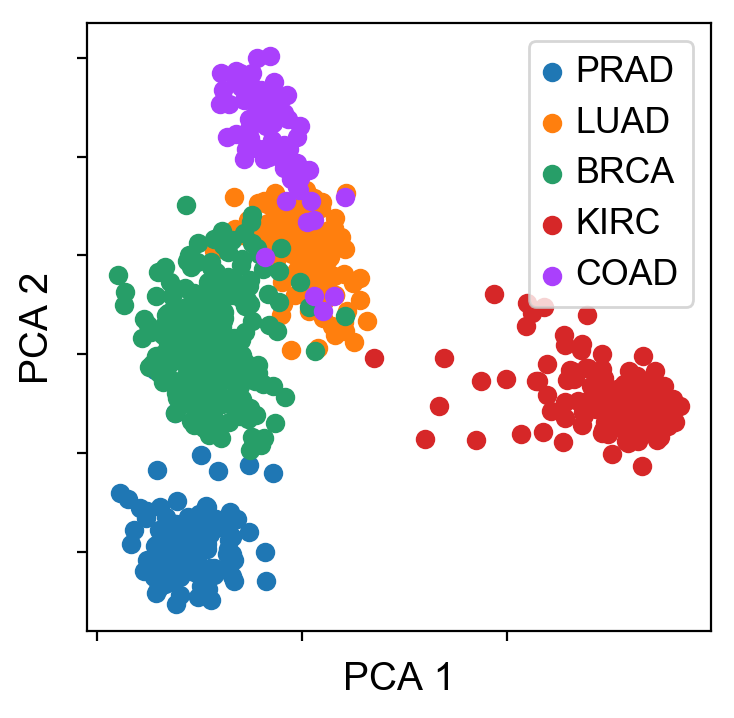

In [1090]:
#Plot the PC transformed data scatter plot colored based on original "Cancer Type" label
fig, ax = plt.subplots(1, 1)
for iG,i in enumerate(types):
    ax.scatter(data_sort[data_sort['Cancer Type'] == f'{i}']['PCA1'], data_sort[data_sort['Cancer Type'] == f'{i}']['PCA2'], label = f'{i}')
    
    ax.grid(False)
    ax.set_xlabel('PCA 1')
    ax.set_ylabel('PCA 2')
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    
    ax.legend()





Projection of high dimensional data into 2D space reveals that all the 5 different cancer samples form different cluster in the gene expression space

## Load genes names

Load gene names from Datasets repository on https://www.synapse.org/#!Synapse:syn4301332. Gene expression tsv file has all the names for each gene and database states that dummy genes names were assigned without changing the index positions

In [1102]:
#load gene names from the dataset
genes = pd.read_csv('PANCAN_IlluminaGA_RNASeqV2geneExp.csv', index_col = 0)
gene_names =[]

#the gene name is composed out of name and Entrez Gene ID. Let's only keep the gene name
for iG,i in enumerate(list(genes.index.values)):
    gene_names.append(list(genes.index.values)[iG].split("|")[0])
data_num.columns = gene_names
data = data_num.copy()
data['Cancer Type'] = labels

Split the data set based on labels for cancer type so it could be loaded separately

In [1104]:
type_data = {}
for i in data['Cancer Type'].unique():
    dat = (data[data['Cancer Type'] == f'{i}'])
    dat.drop(columns = 'Cancer Type', inplace = True)
    type_data["{0}".format(i)] = sc.AnnData(dat)

/Users/ignasmazelis/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Use separated data to create a single AnnData object with different types for each cancer dataset

In [1175]:
adata = sc.AnnData.concatenate(*[type_data[s] for s in types], 
                               batch_categories=types,
                               batch_key='type')

print(adata)

AnnData object with n_obs × n_vars = 801 × 20531 
    obs: 'type'


Standard deviantion is 3183.4379502621327
Mean  is 132287.8491241417


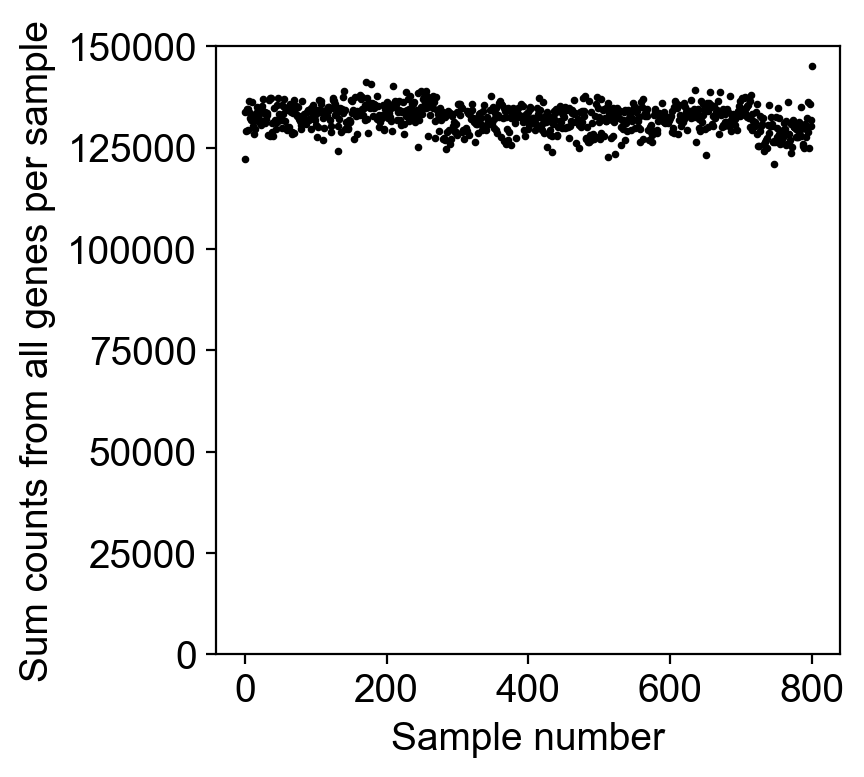

In [1176]:
fig, ax = plt.subplots(1, 1)
ax.scatter(range(0, 801), adata.X.T.sum(0).tolist(), c='black', alpha = 1, s = 3)
ax.grid(False)
ax.set_ylim(0, 150000)
ax.set_xlabel('Sample number')
ax.set_ylabel('Sum counts from all genes per sample')
print('Standard deviantion is', np.std(adata.X.T.sum(0).tolist()))
print('Mean  is', np.mean(adata.X.T.sum(0).tolist()))

Let's normalize the data so all of the 801 samples have the same number of counts and can be compared

In [1177]:
#normalize the data to 130 000 counts
sc.pp.normalize_total(adata, target_sum=1.3e5)

Standard deviantion is 1.0942133128440594
Mean  is 130000.0007022472


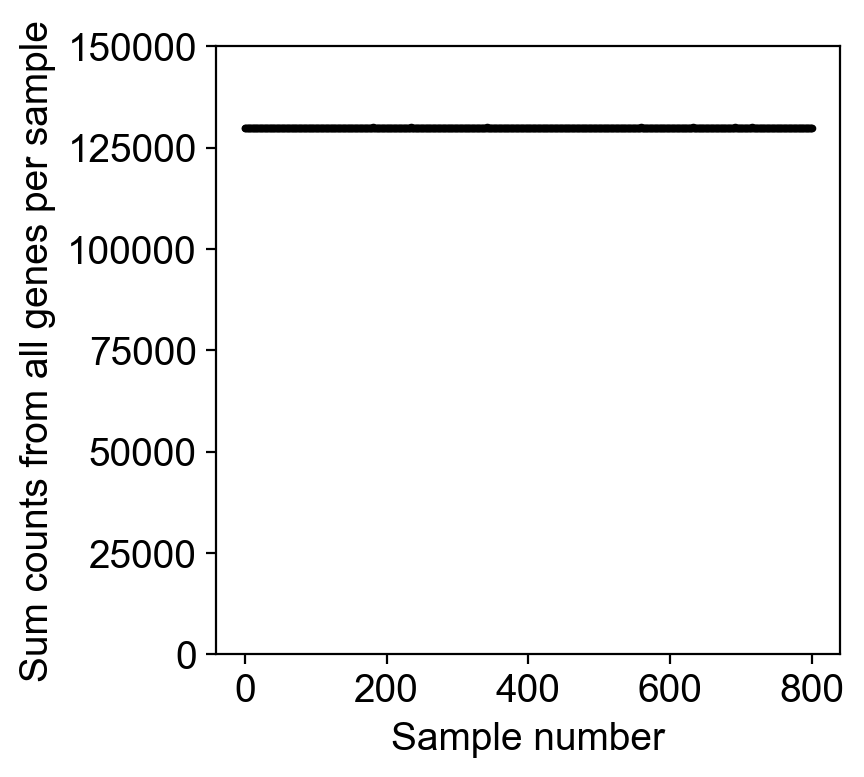

In [1178]:
fig, ax = plt.subplots(1, 1)
ax.scatter(range(0, 801), adata.X.T.sum(0).tolist(), c='black', alpha = 1, s = 3)
ax.grid(False)
ax.set_ylim(0, 150000)
ax.set_xlabel('Sample number')
ax.set_ylabel('Sum counts from all genes per sample')
print('Standard deviantion is', np.std(adata.X.T.sum(0).tolist()))
print('Mean  is', np.mean(adata.X.T.sum(0).tolist()))

## Data UMAP clustering

Redo the PCA analysis on the AnnData object

In [1189]:
sc.pp.log1p(adata)

In [1190]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=-1)

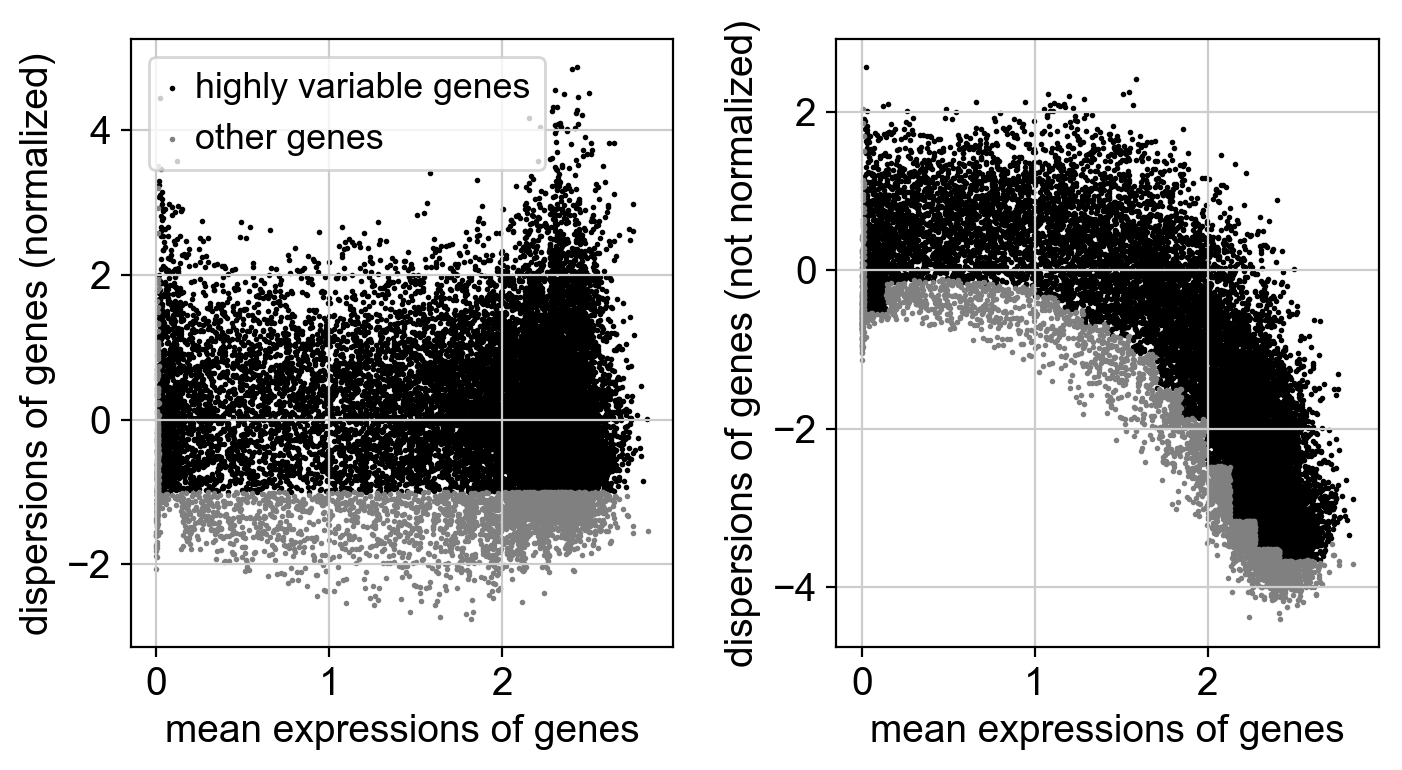

In [1191]:
sc.pl.highly_variable_genes(adata)

In [1149]:
adata = adata[:, adata.var.highly_variable]

In [1150]:
# The dataset only has 801 samples, therefore a higher number of components was 
#used to better differiante the data
sc.tl.pca(adata, n_comps=50)

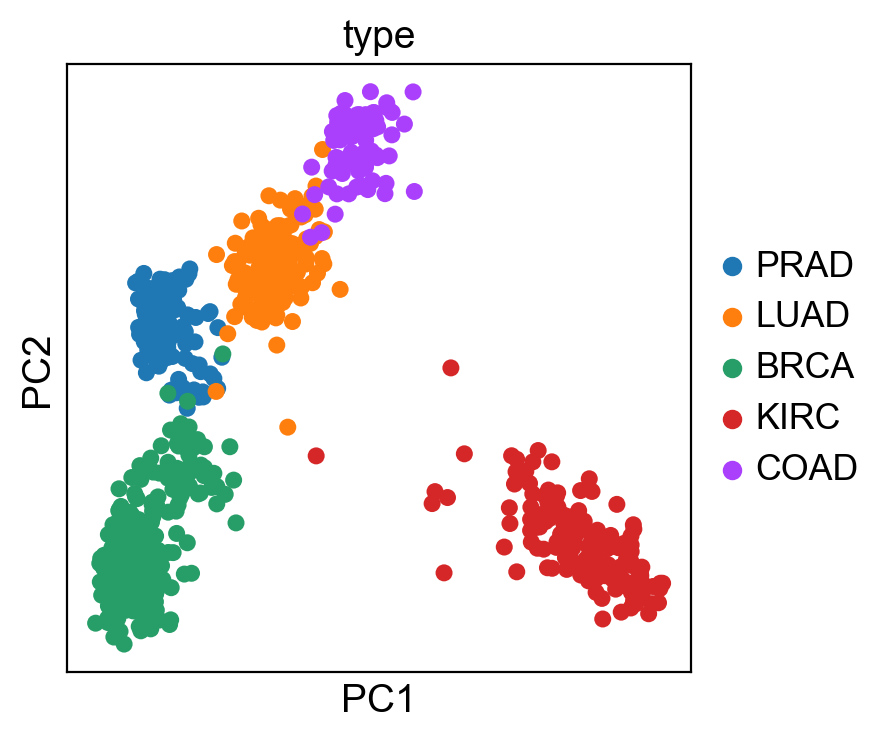

In [1151]:
sc.pl.pca(adata, color='type')

In [1152]:
sc.pp.neighbors(adata, n_neighbors=50, use_rep='X_pca')

In [1153]:
sc.tl.umap(adata)

In [1154]:
sc.tl.leiden(adata)

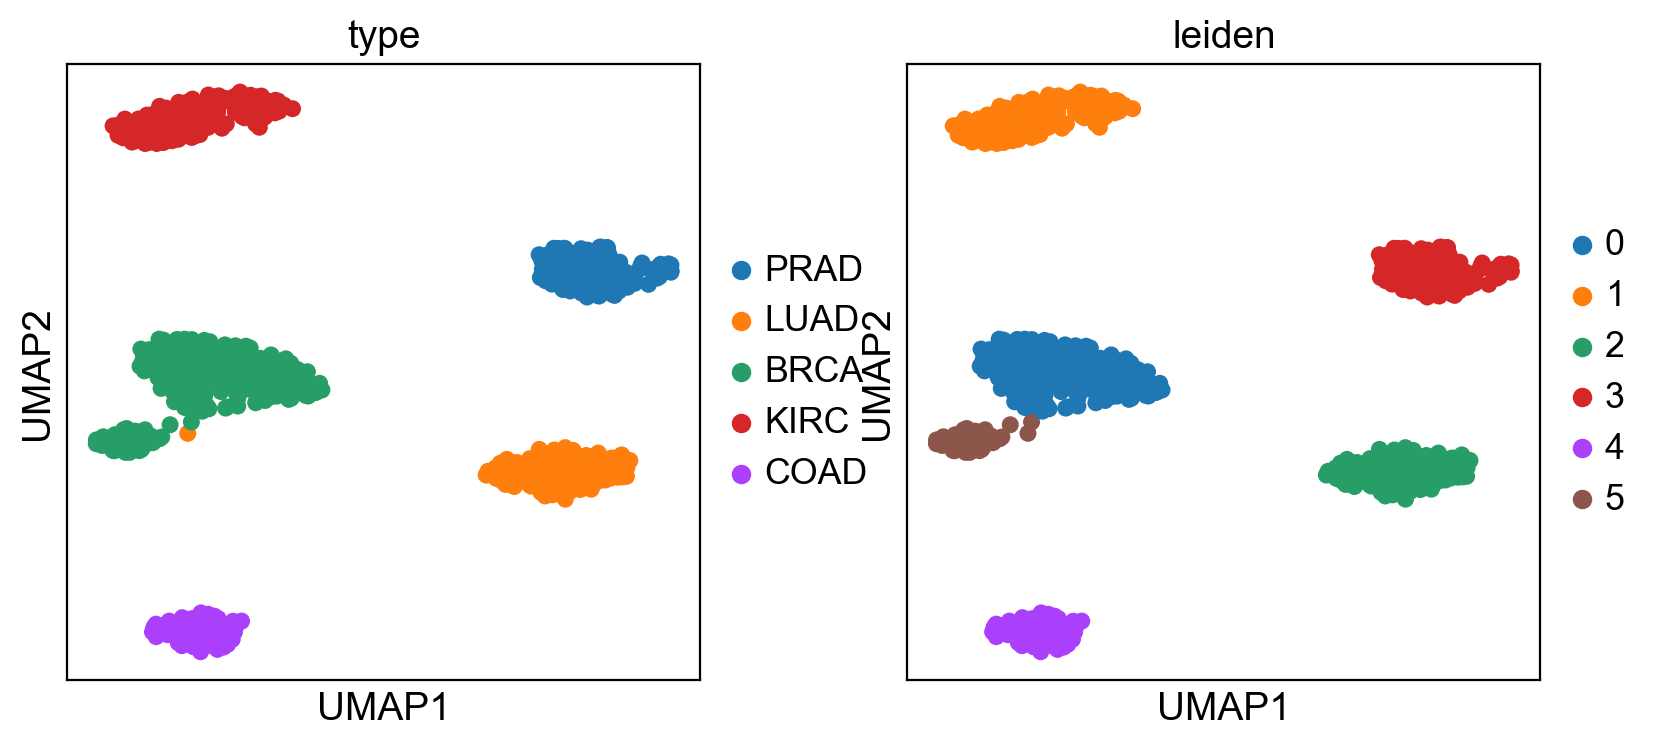

In [1155]:
sc.settings.set_figure_params(dpi=100)
sc.pl.umap(adata, color=['type', 'leiden'])

Try out a range of component numbers for data clustering

number of components = 10


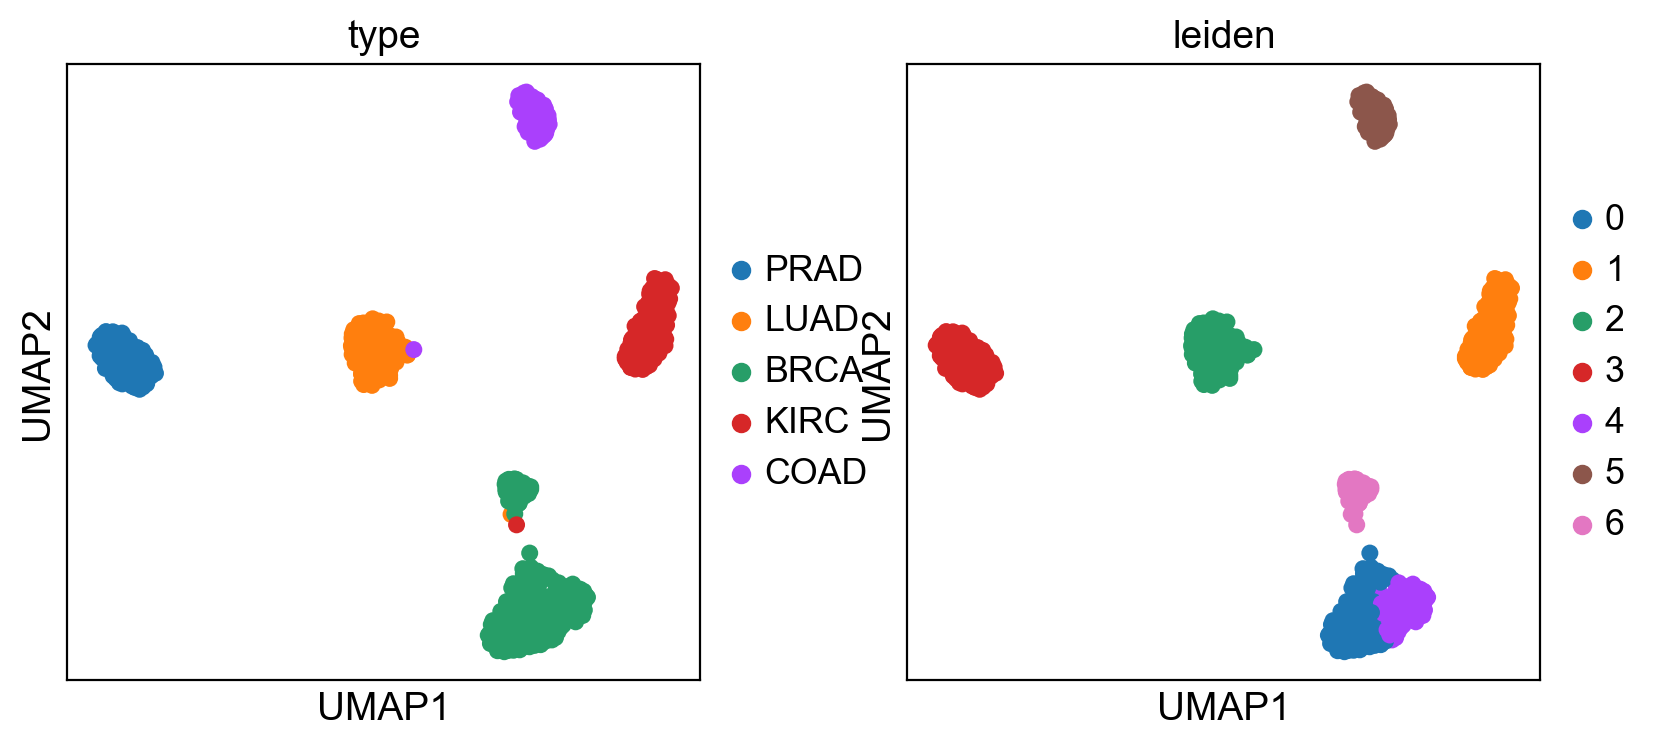

number of components = 20


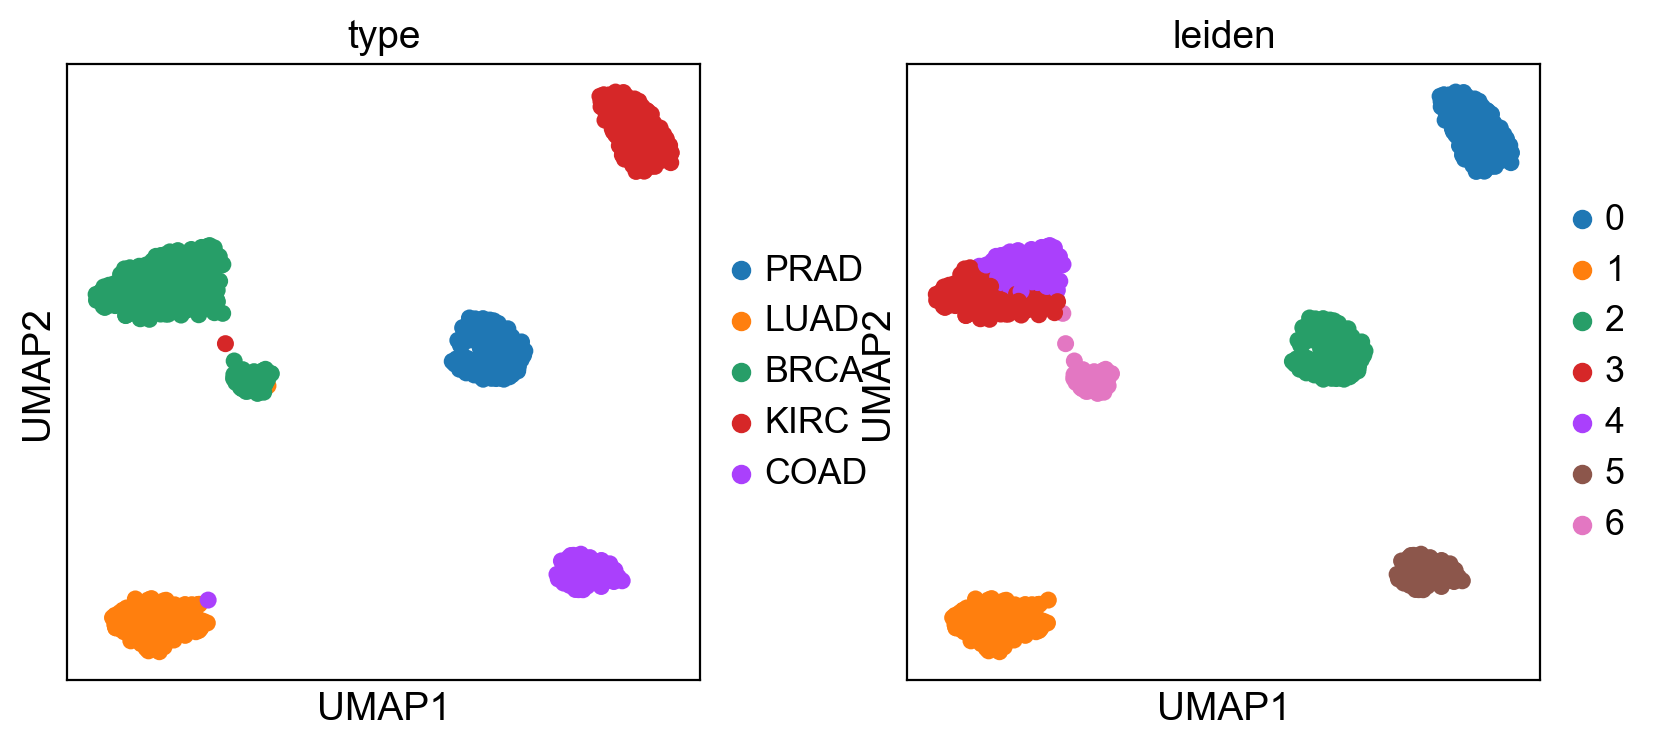

number of components = 30


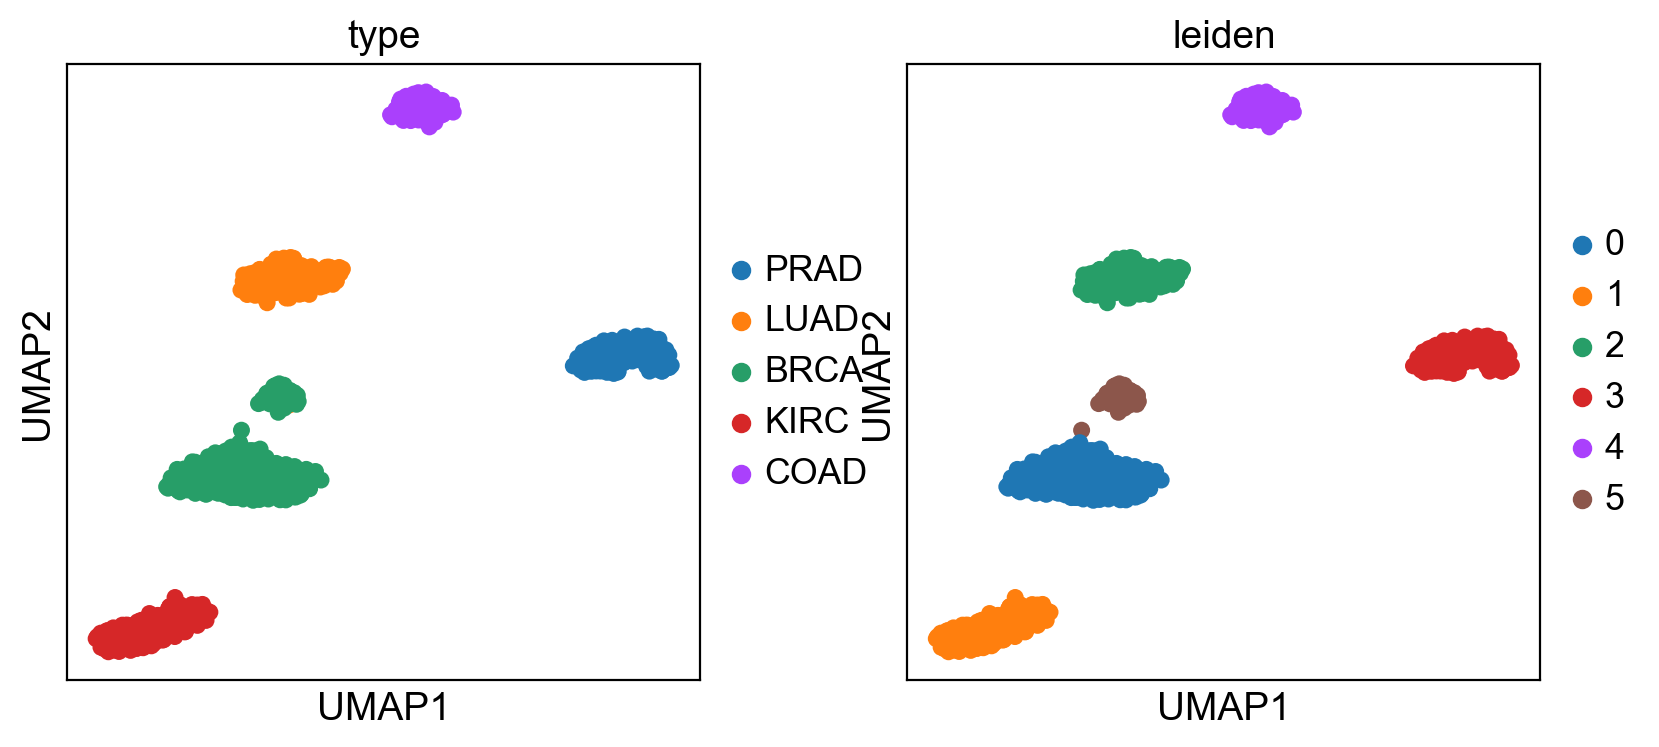

number of components = 40


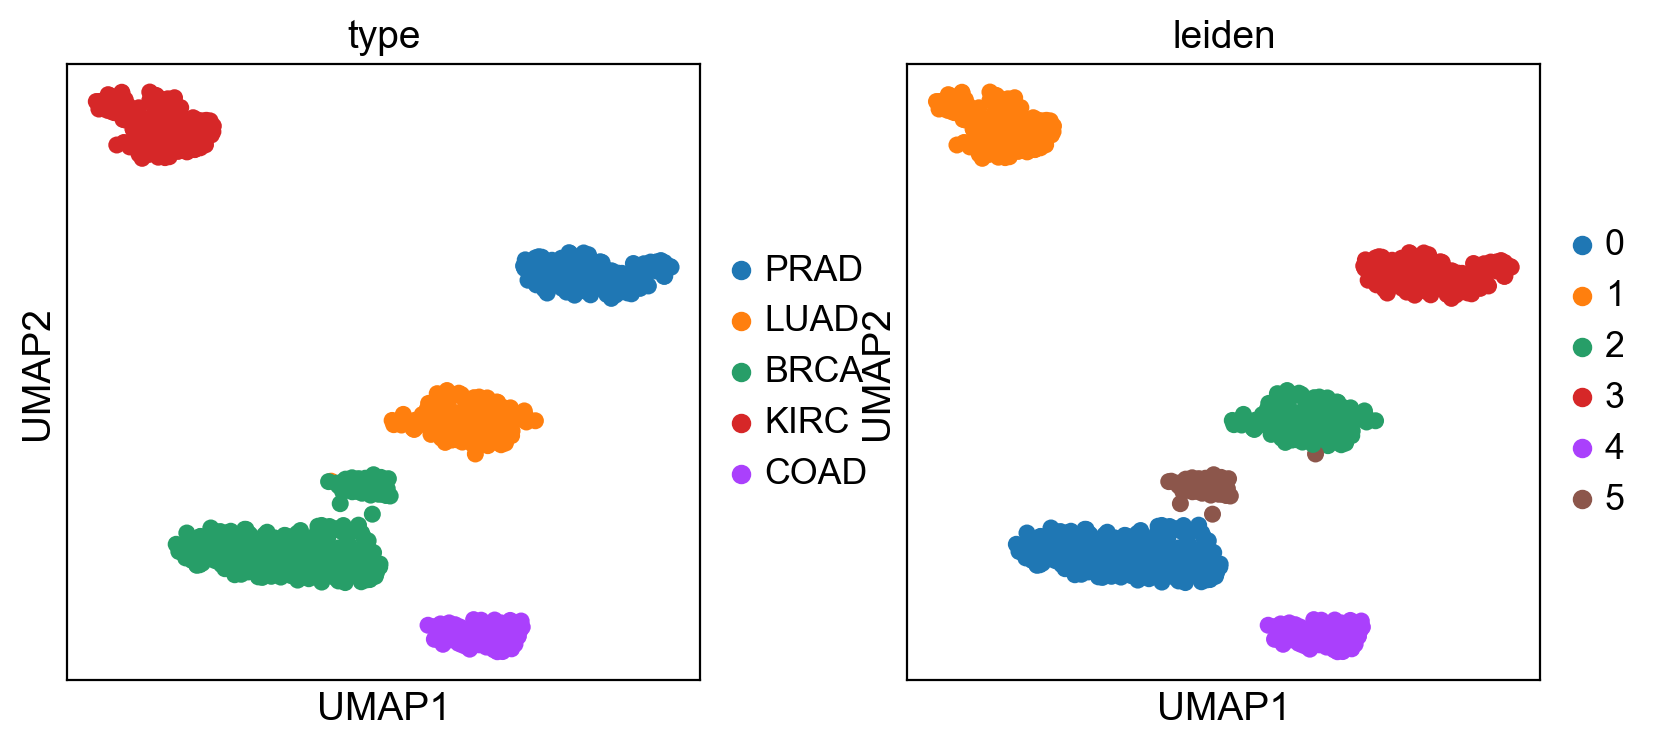

number of components = 50


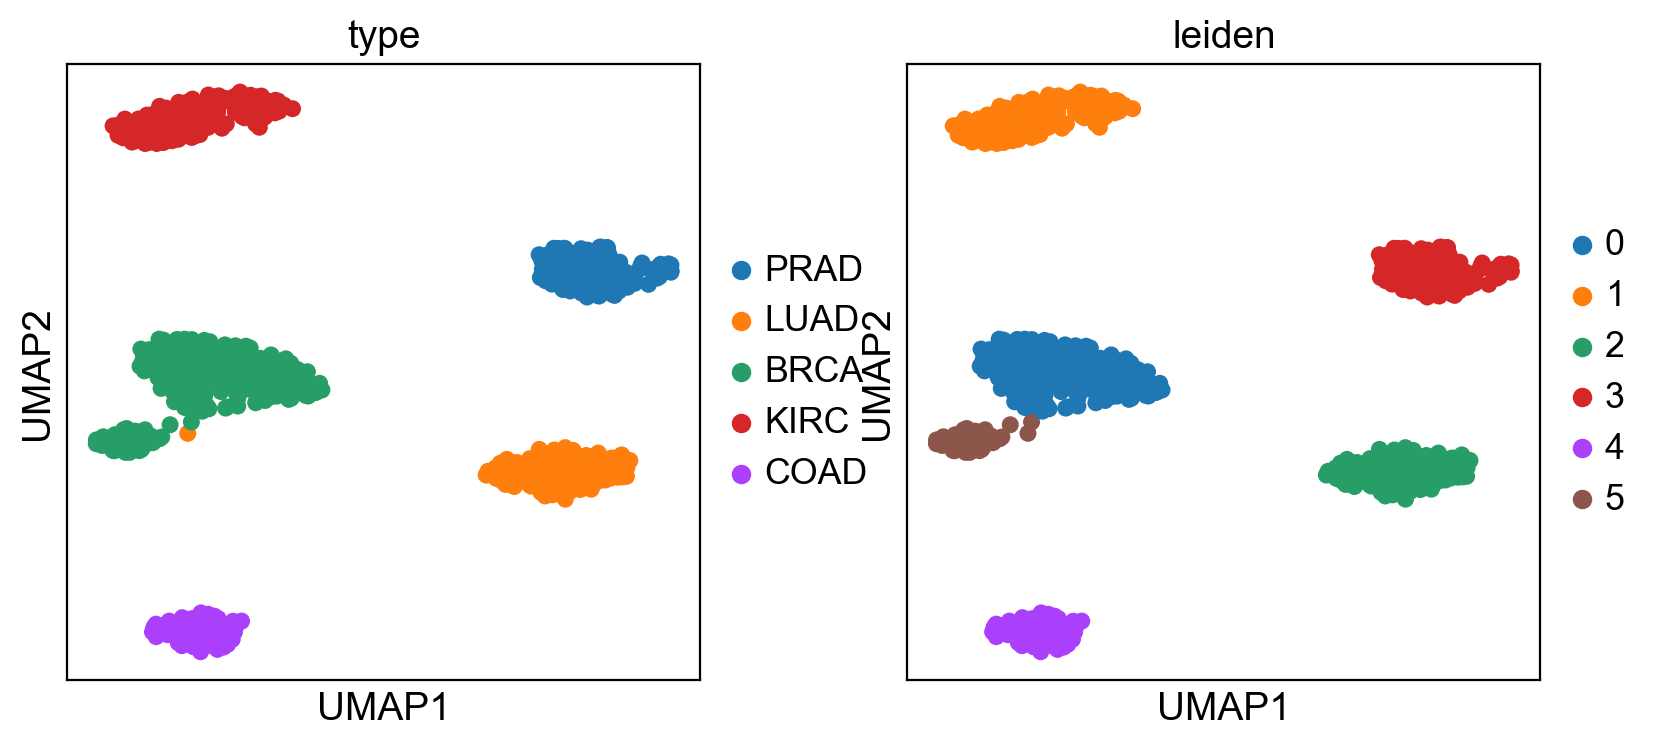

In [1156]:
sc.settings.set_figure_params(dpi=50)
#use this number of components to generate UMAP graph
comps = [10, 20, 30, 40, 50]

#store data with different number of PC's in a dict
data_pca = {}

for iG,i in enumerate(comps):
    sc.tl.pca(adata, n_comps = comps[iG])
    sc.pp.neighbors(adata, n_neighbors=50, use_rep='X_pca')
    sc.tl.umap(adata)
    sc.tl.leiden(adata)
    sc.settings.set_figure_params(dpi=100)
    print(f'number of components = {comps[iG]}')
    sc.pl.umap(adata, color=['type', 'leiden'])
    data_pca[f'{comps[iG]}'] = adata.copy()

1. Data, clustered with >30 PC look the most correct, as the granuality of clustering matches the labels of cancer types.
2. Differential gene expression analysis must be carried out to understand if clustering inside single cancer type provides any additional information.
3. BRCA cancer sample seems to be different and forms two populations, it's clustered into two groups

Differential gene expression function is taken from https://github.com/AllonKleinLab/klunctions/tree/master/sam/Analysis/scBasics/helper_functions.py

In [1204]:
def get_dge(ad, mask1, mask2, min_frac_expr=0, pseudocount=1):
    import statsmodels.sandbox.stats.multicomp
    import scipy.stats
    
    gene_mask = ((ad.X[mask1,:]>0).sum(0).squeeze()/mask1.sum() > min_frac_expr) | ((ad.X[mask2,:]>0).sum(0).squeeze()/mask2.sum() > min_frac_expr)
    print(gene_mask.sum())
    E1 = ad.X[mask1,:][:,gene_mask]
    E2 = ad.X[mask2,:][:,gene_mask]
    
    m1 = E1.mean(0) + pseudocount
    m2 = E2.mean(0) + pseudocount
    #r = np.log2(m1 / m2)
    r = np.log2(np.exp(m1) / np.exp(m2))
    
    pv = np.zeros(gene_mask.sum())
    for ii,iG in enumerate(np.nonzero(gene_mask)[0]):
        pv[ii] = scipy.stats.ranksums(E1[:,ii], E2[:,ii])[1]
    pv = statsmodels.sandbox.stats.multicomp.multipletests(pv, alpha=0.05, method='fdr_bh',)[1]
    
    df = pd.DataFrame({
        'gene': ad.var_names.values.astype(str)[gene_mask],
        'pv': pv,
        'm1': m1 - pseudocount, 
        'm2': m2 - pseudocount, 
        'ratio': r
    })
    
    return df

## Differential gene expresion analysis among clusters

Function to perform differential gene expression on each differently cluistered sample

In [1196]:
def DGE(sample, num):
    
    #initial vlaues
    dge_data = {}
    dge_all = {}
    dge_genes = pd.DataFrame()
    
    #run get_dge on all samples
    for i in range(0, num):
            print(f'cluster {i}')
            #Perform dge analysis of each cluster against all other clusters
            all_clusters =[f'{i}' for i in range(0, num)]
            all_clusters.remove(f'{i}')
            
            #create a mask to compare single cluster to the rest
            mask1 = np.in1d(sample.obs_vector('leiden'), [f'{i}'])
            mask2 = np.in1d(sample.obs_vector('leiden'), all_clusters)
            
            dge_df = get_dge(sample, mask1, mask2)
            
            #store the dge data in a dict
            dge_all[f'Cluster {i}'] = dge_df
            #Keep only significant data and sort based on expression ratio
            dge_data[f'Cluster {i}']= dge_df.query('pv < 0.05').sort_values('ratio', ascending=False).head(25)
    
    #process the dge data
    for iG, cluster in enumerate(dge_data):
        #name columns based on cluster analyzed
        dge =  pd.Series(dge_data[f'{cluster}']['gene'], name = cluster)
        dge = dge.reset_index()
        #store the data in a single dataframe
        dge_genes = pd.concat([dge_genes, dge], axis=1)
    
    #drop index column
    dge_genes.drop('index', axis = 1, inplace = True)
    return dge_genes

Perform differential gene expression of samples, clustered using different number of PCs

In [1207]:
dge_data = {}
for iG,i in enumerate(data_pca):
    dge_data[f'{i}'] = DGE(data_pca[i], len(data_pca[i].obs['leiden'].unique()))

cluster 0
2944
cluster 1
2944
cluster 2
2944
cluster 3
2944
cluster 4
2944
cluster 5
2944
cluster 6
2944
cluster 0
2944
cluster 1
2944
cluster 2
2944
cluster 3
2944
cluster 4
2944
cluster 5
2944
cluster 6
2944
cluster 0
2944
cluster 1
2944
cluster 2
2944
cluster 3
2944
cluster 4
2944
cluster 5
2944
cluster 0
2944
cluster 1
2944
cluster 2
2944
cluster 3
2944
cluster 4
2944
cluster 5
2944
cluster 0
2944
cluster 1
2944
cluster 2
2944
cluster 3
2944
cluster 4
2944
cluster 5
2944


Inspect top five differently expressed genes for each sample

In [1208]:
dge_data['10'].head(5)

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6
0,ANKRD30A,ACSM2B,SFTA3,PRAC,ANKRD30A,FABP1,ZIC1
1,FLJ45983,ACSM2A,SFTPC,TMEFF2,ADIPOQ,KRT20,HORMAD1
2,ANKRD30B,SLC17A3,NKX2-1,PCA3,TFAP2B,CDX2,ROPN1
3,PIP,CDH16,SCGB3A2,CHRNA2,MUCL1,EPS8L3,EN1
4,CYP4Z2P,UGT2A3,PLUNC,PABPC1L2B,CIDEA,PDX1,CXorf49B


In [1209]:
dge_data['20'].head(5)

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6
0,ACSM2B,SFTA3,PRAC,ANKRD30A,ADIPOQ,FABP1,ZIC1
1,ACSM2A,SFTPC,TMEFF2,FLJ45983,ANKRD30A,KRT20,ROPN1
2,SLC17A3,NKX2-1,PCA3,ANKRD30B,TFAP2B,CDX2,HORMAD1
3,CDH16,SCGB3A2,CHRNA2,PIP,MUCL1,EPS8L3,EN1
4,UGT2A3,PLUNC,PABPC1L2B,CYP4Z2P,CIDEA,PDX1,CXorf49B


In [1210]:
dge_data['30'].head(5)

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5
0,ANKRD30A,ACSM2B,SFTA3,PRAC,FABP1,ZIC1
1,TFAP2B,ACSM2A,SFTPC,TMEFF2,KRT20,ROPN1
2,ADIPOQ,SLC17A3,NKX2-1,PCA3,CDX2,HORMAD1
3,FLJ45983,CDH16,SCGB3A2,CHRNA2,EPS8L3,EN1
4,CYP4Z2P,AGXT2,PLUNC,PABPC1L2B,PDX1,CXorf49B


In [1211]:
dge_data['40'].head(5)

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5
0,ANKRD30A,ACSM2B,SFTA3,PRAC,FABP1,HORMAD1
1,TFAP2B,ACSM2A,SFTPC,TMEFF2,KRT20,ZIC1
2,ADIPOQ,SLC17A3,NKX2-1,PCA3,CDX2,ROPN1
3,FLJ45983,CDH16,SCGB3A2,CHRNA2,EPS8L3,EN1
4,CYP4Z2P,AGXT2,PLUNC,PABPC1L2B,PDX1,CXorf49B


In [1262]:
dge_data['50'].head(5)

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5
0,ANKRD30A,ACSM2B,SFTA3,PRAC,FABP1,HORMAD1
1,TFAP2B,ACSM2A,SFTPC,TMEFF2,KRT20,ZIC1
2,ADIPOQ,SLC17A3,NKX2-1,PCA3,CDX2,ROPN1
3,FLJ45983,CDH16,SCGB3A2,CHRNA2,EPS8L3,EN1
4,CYP4Z2P,AGXT2,PLUNC,PABPC1L2B,PDX1,CXorf49B


Going above 30 Principal componants has no effect on the data clustering and 5 top differently expressed genes are the same

Let's visually inspect the expression of BRCA cluster sample

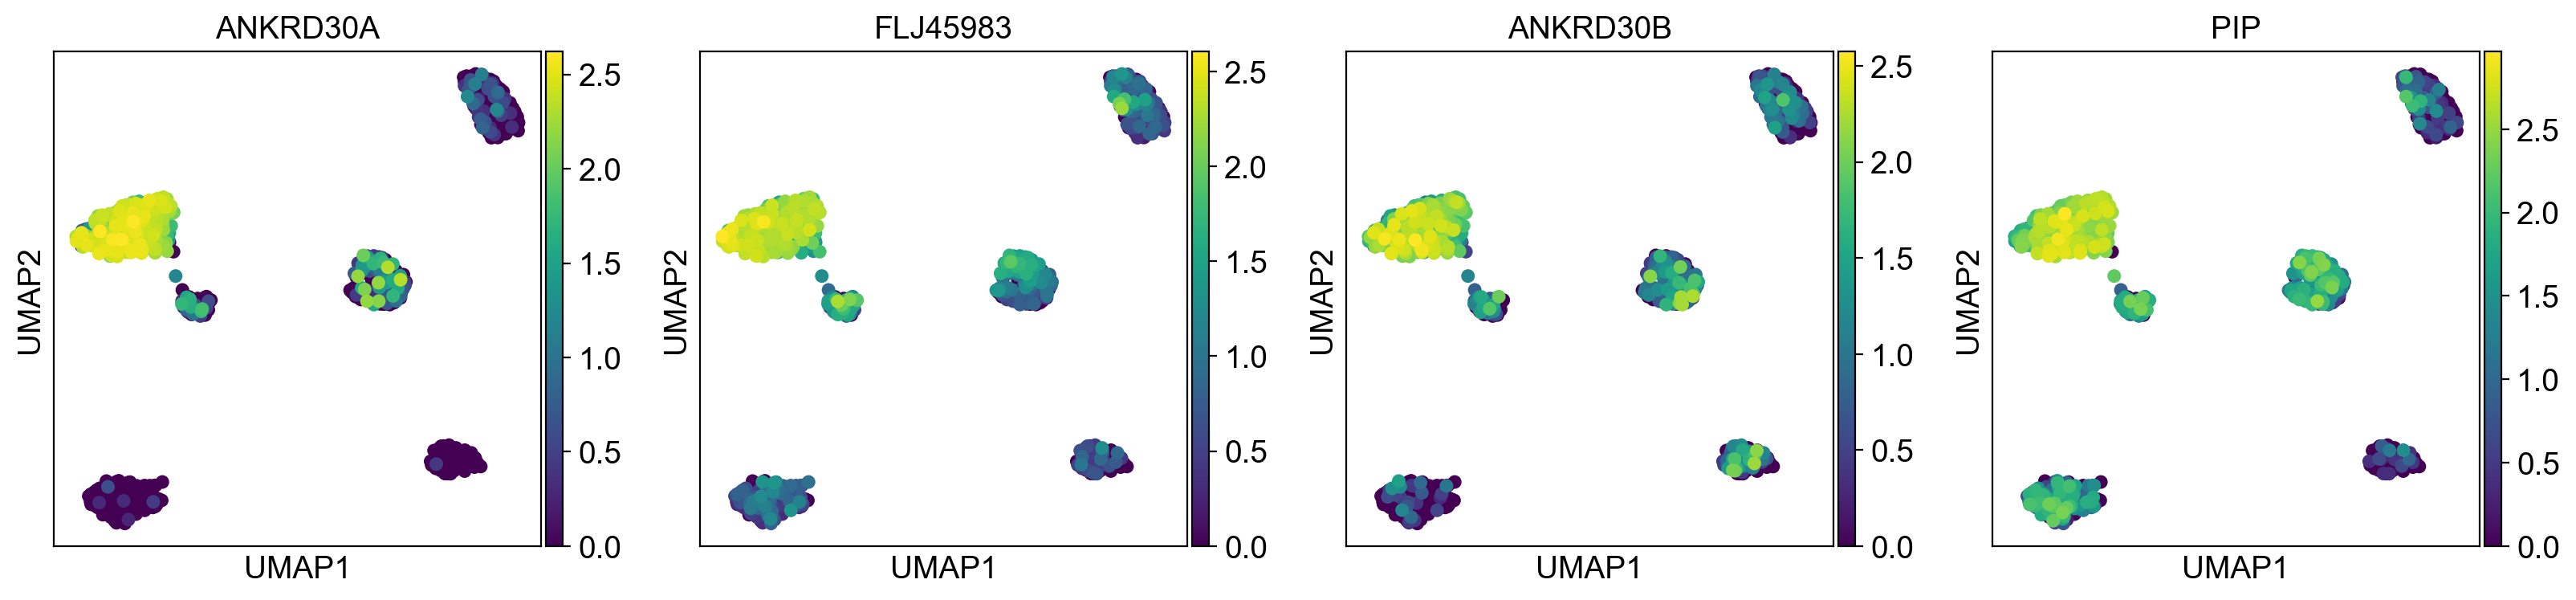

In [1246]:
# plot top4 ranked differentially expressed genes for BRCA sample cluster 0
sc.pl.umap(data_pca['20'], color=dge_data['20']['Cluster 3'].head(4).tolist())

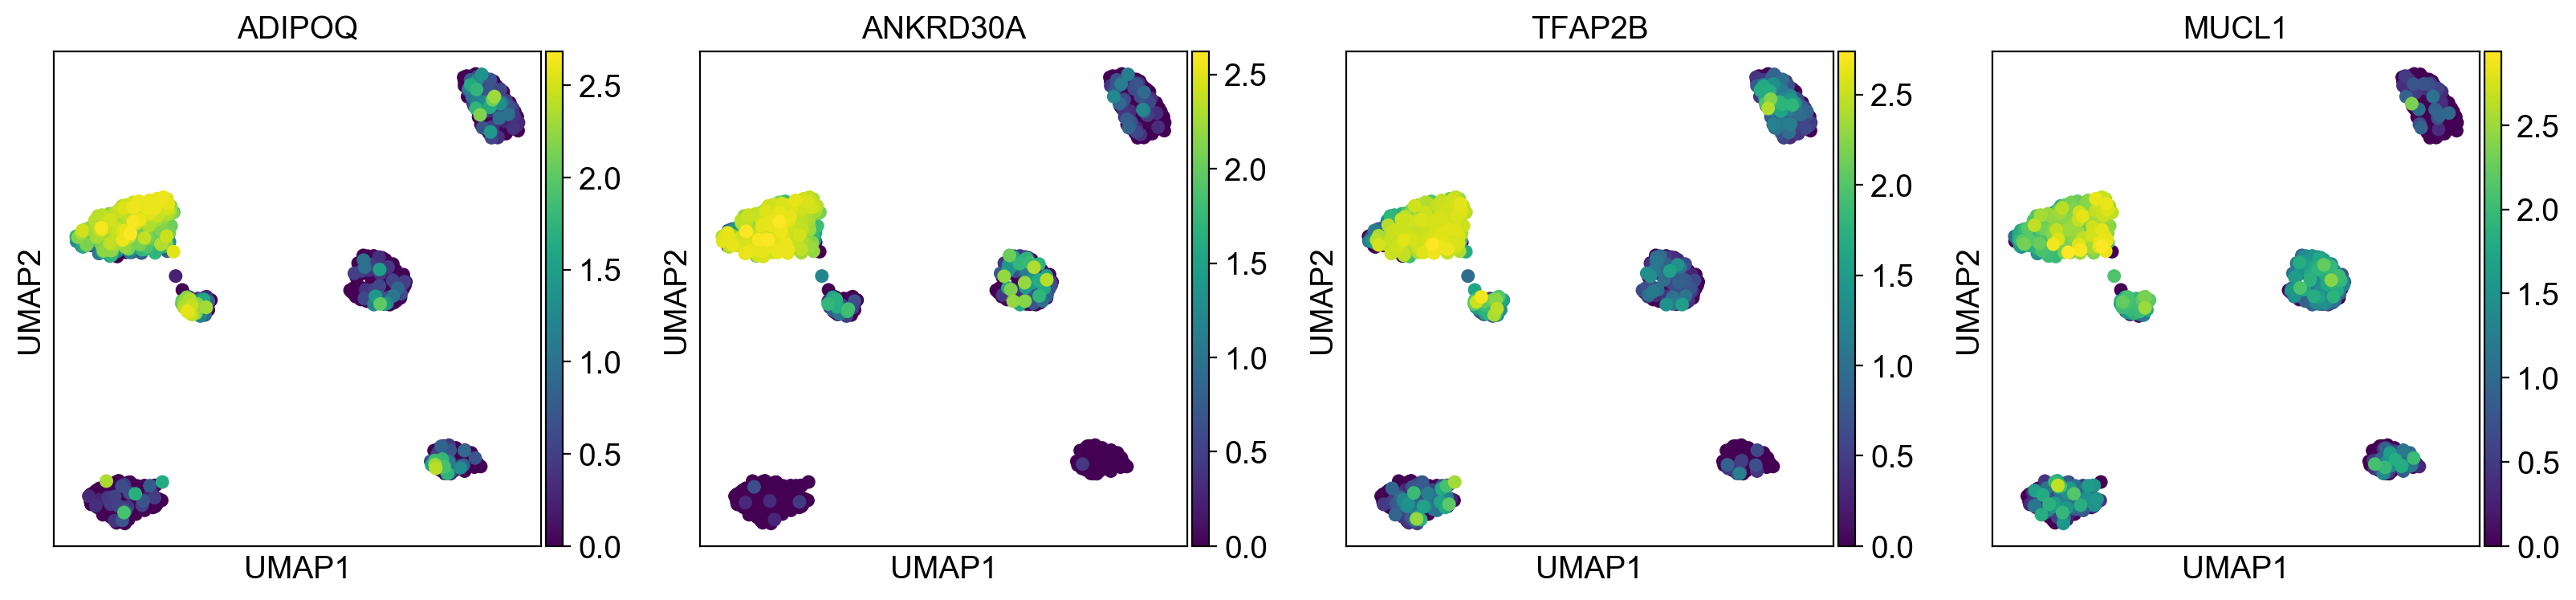

In [1266]:
# plot top4 ranked differentially expressed genes for BRCA sample cluster 4
sc.pl.umap(data_pca['20'], color=dge_data['20']['Cluster 4'].head(4).tolist())

There is no uniquelly expressed gene in BRCA sample two cluster

Let's compare the gene expression between two clusters in BRCA sample

In [1250]:
mask1 = np.in1d(data_pca['20'].obs_vector('leiden'), ['3'])
mask2 = np.in1d(data_pca['20'].obs_vector('leiden'), ['4'])
dge_df = get_dge(data_pca['20'], mask1, mask2)
dge_pc20 = dge_df.query('pv < 0.05').sort_values('ratio', ascending=False)
    

2932


In [1251]:
dge_pc20.head(5)

,gene,pv,m1,m2,ratio
431,CASP14,2.126802e-05,0.920688,0.417317,0.726212
920,EPYC,2.723315e-07,1.680016,1.318275,0.521882
398,CA9,4.876850e-03,1.143874,0.825725,0.458992
2450,SLC35D3,2.149588e-05,0.762535,0.445755,0.457018
1256,HHIPL2,7.682365e-05,1.566610,1.257884,0.445397


There are no genes, that have high fold change

Based on data, let's use data clustering with 30 PCs as it has better cluster separation

Redo the DGE analysis to store p-values

In [1263]:

#initial vlaues
dge_data_50pc = {}
dge_all_50pc = {}

#run get_dge on all samples
for i in range(0, len(data_pca['30'].obs['leiden'].unique())):
        print(f'cluster {i}')
        #Perform dge analysis of each cluster against all other clusters
        all_clusters =[f'{i}' for i in range(0, len(data_pca['30'].obs['leiden'].unique()))]
        all_clusters.remove(f'{i}')
        
        #create a mask to compare single cluster to the rest
        mask1 = np.in1d(data_pca['30'].obs_vector('leiden'), [f'{i}'])
        mask2 = np.in1d(data_pca['30'].obs_vector('leiden'), all_clusters)
        
        dge_df = get_dge(data_pca['0'], mask1, mask2)
        
        #store the dge data in a dict
        dge_all_50pc[f'Cluster {i}'] = dge_df


cluster 0
2944
cluster 1
2944
cluster 2
2944
cluster 3
2944
cluster 4
2944
cluster 5
2944


In [1264]:
dge_all_50pc['Cluster 2'].query('pv < 0.05').sort_values('ratio', ascending=False).head(5)

,gene,pv,m1,m2,ratio
2384,SFTA3,1.438472e-72,2.375943,0.122064,3.251661
2385,SFTPC,9.434885e-73,2.295328,0.120049,3.138263
1842,NKX2-1,1.438472e-72,2.423013,0.303884,3.057257
2323,SCGB3A2,3.160360e-69,2.258906,0.210055,2.955868
2077,PLUNC,7.210618e-66,1.992594,0.103488,2.725404
